In [1]:
import os
import patoolib
import platform

ds_path = 'E:\\MEGA\\VTCA\\AI_Specialist\\AI_Workspace\\3. Dataset\\'
if platform.system().lower() == 'linux':
    ds_path = '/home/pep/drive/MEGA/VTCA/AI_Specialist/AI_Workspace/3. Dataset/'

fold_name = 'AI Specialist Lesson 08'

path = ds_path + fold_name
os.chdir(ds_path)

if not os.path.exists(path):
    patoolib.extract_archive(f"{fold_name}.rar")

os.chdir(path+'/BigMartSales Prediction')

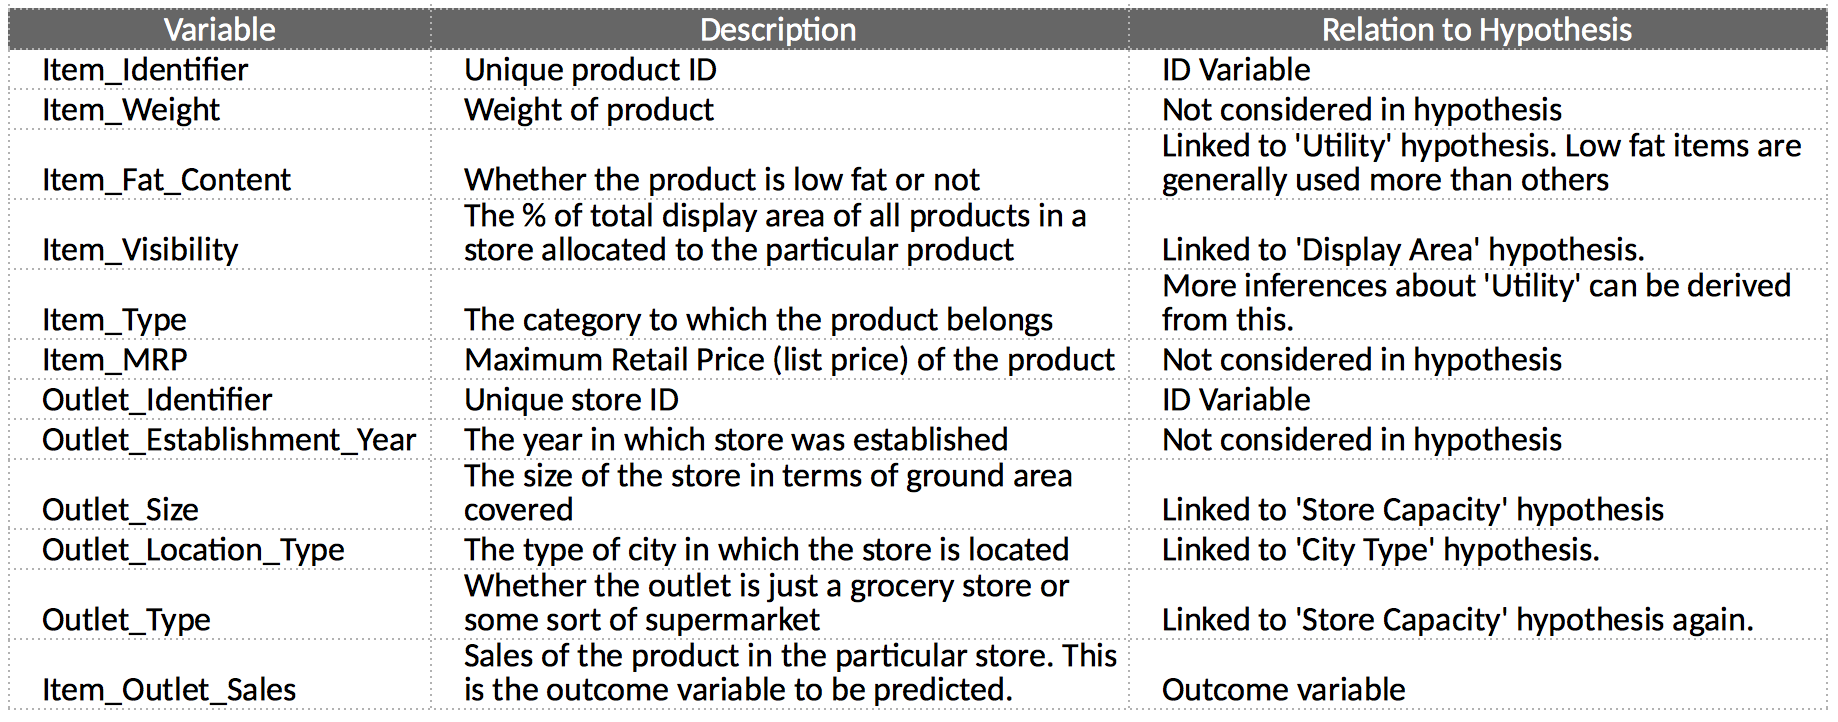

In [2]:
from IPython.display import display, Image
display(Image(filename= 'Description.png'))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

train.shape, test.shape

((8523, 12), (5681, 11))

In [5]:
display(train.head())
display(test.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0.0

# Concat the data in df variable
df = pd.concat([train, test], sort=False, ignore_index=True)
display(df.head())
print(df.shape)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


(14204, 13)


# Check missing, skewness and unique values

In [7]:
df.isnull().sum()

# Item_Weight, Outlet_Size have missing values

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [8]:
df.skew()

Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

In [9]:
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [10]:
df.describe()
# Missing in Item_Weight because count = 11765 < total = 14204
# Missing in Item_Visibility (contain unreasonable value - 0)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Outlet_Sales'>

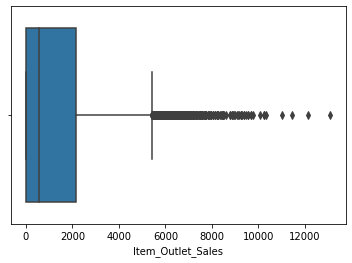

In [11]:
# Keep outliers in target Item_Outlet_Sales to boost ML techniques
sns.boxplot(df['Item_Outlet_Sales'])

# Univariate Analysis

## Find categorical features

In [12]:
cat = [feature for feature in df if df[feature].dtypes == "object" and feature!='source']
cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
cat_idx = list(df.dtypes == 'object')
cat = list(df.columns[cat_idx])
cat.remove('source')
print(cat)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

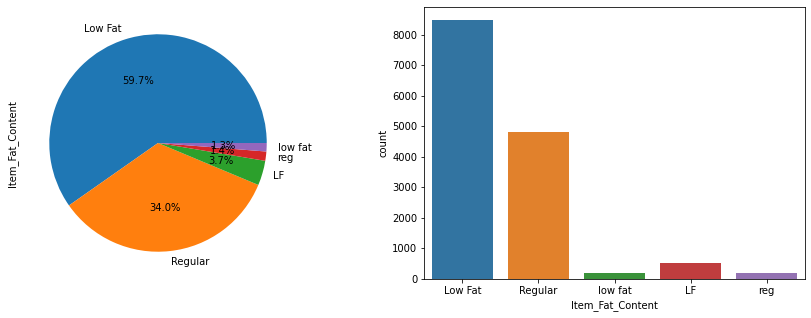

In [14]:
feature = 'Item_Fat_Content'
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df[feature].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df[feature])
df[feature].value_counts()

## Find continuos features

In [15]:
#Separating the continuous feature
cont=[feature for feature in df.columns if df[feature].dtypes != "object" 
      and feature not in ['Item_Identifier', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']]
cont

['Item_Weight', 'Item_Visibility', 'Item_MRP']

<Figure size 432x288 with 0 Axes>

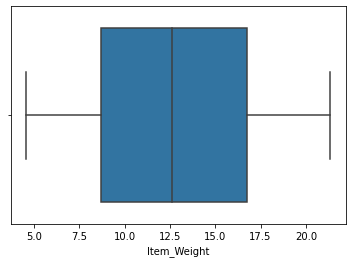

<Figure size 432x288 with 0 Axes>

In [16]:
feature = 'Item_Weight'
sns.boxplot(df[feature])
plt.figure()

# Bivariate

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Outlet_Type'>

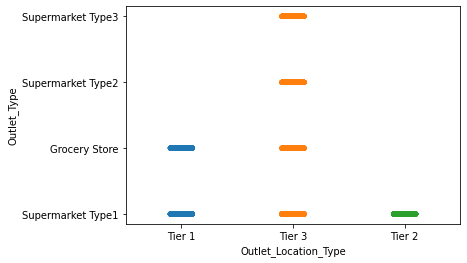

In [17]:
sns.stripplot(df['Outlet_Location_Type'], df['Outlet_Type'])
# Tier 3 contains all outlet types => Tier 3 probably central city

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Visibility'>

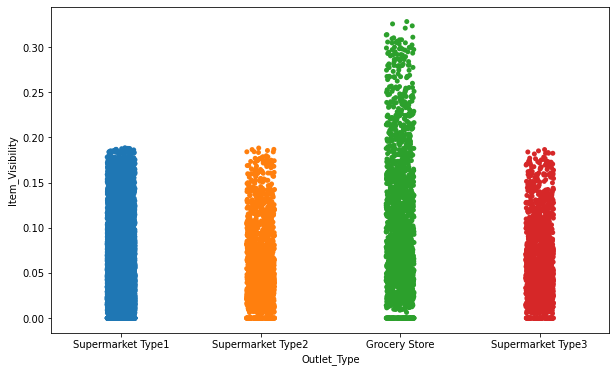

In [18]:
plt.figure(figsize=(10, 6))
sns.stripplot(df['Outlet_Type'], df['Item_Visibility'])

<Figure size 432x288 with 0 Axes>

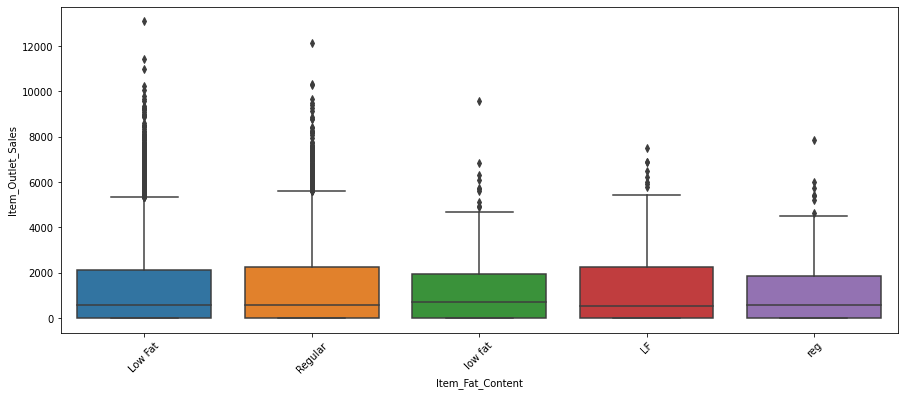

<Figure size 432x288 with 0 Axes>

In [19]:
feature = "Item_Fat_Content"
plt.figure(figsize=(15,6))
sns.boxplot(x=df[feature],y=df['Item_Outlet_Sales'])
plt.xticks(rotation=45)
plt.figure()

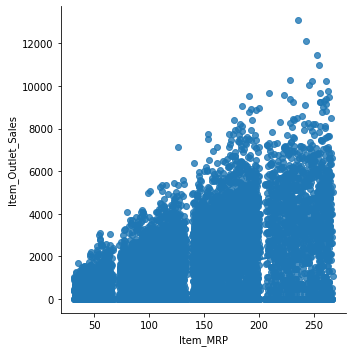

In [20]:
sns.lmplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)
# Item_MRP increase -> Item_Outlet_Sales increase

# Multivariate

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

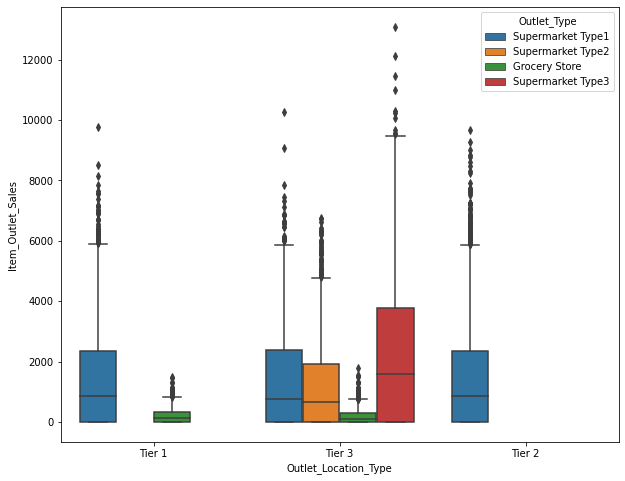

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot('Outlet_Location_Type', 'Item_Outlet_Sales', hue='Outlet_Type', data=df)

<AxesSubplot:>

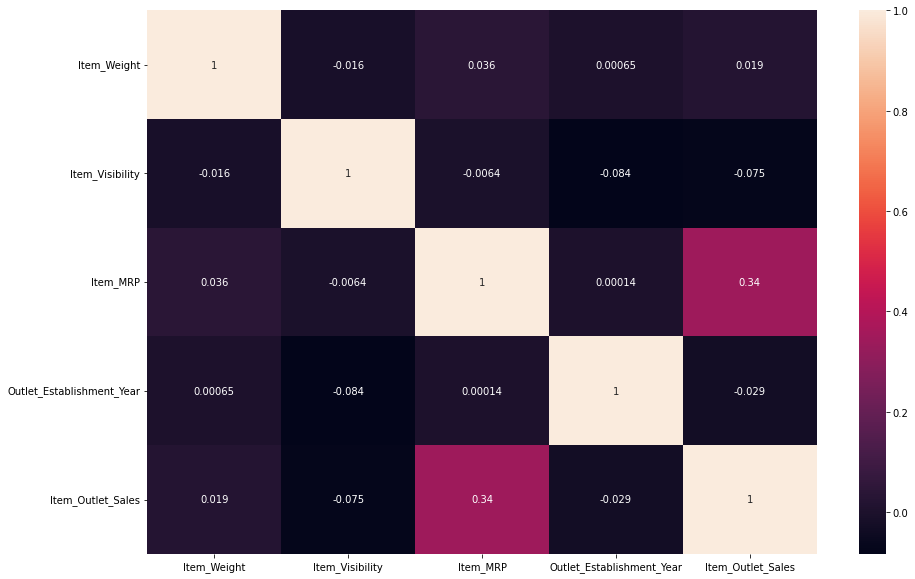

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

# Cleansing Engineering

In [23]:
# Creating pivot table to help fill nan values of visibility from here
table = df.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.109612,0.061707,0.061902,0.062052
Breads,0.105838,0.064048,0.064955,0.060168
Breakfast,0.121208,0.075993,0.074771,0.078609
Canned,0.106519,0.062548,0.060308,0.064172
Dairy,0.115604,0.065769,0.063436,0.064230
Frozen Foods,0.106697,0.061570,0.059600,0.061470
Fruits and Vegetables,0.106525,0.062976,0.062571,0.062509
Hard Drinks,0.104917,0.060258,0.060349,0.060400
Health and Hygiene,0.092512,0.051699,0.049619,0.049143


In [24]:
df['Item_Visibility'].replace(0, np.nan, inplace=True)

def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

df['Item_Visibility'].fillna(df[df['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

In [25]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.069991,141.004977,1997.830681,1308.865489
std,4.652502,0.048748,62.086938,8.371664,1699.791423
min,4.555000,0.003575,31.290000,1985.000000,0.000000
25%,8.710000,0.033143,94.012000,1987.000000,0.000000
50%,12.600000,0.059990,142.247000,1999.000000,559.272000
75%,16.750000,0.095676,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
df.loc[df['Item_Type'].isnull().values, "Item_Weight"]

Series([], Name: Item_Weight, dtype: float64)

In [27]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.069991,141.004977,1997.830681,1308.865489
std,4.652502,0.048748,62.086938,8.371664,1699.791423
min,4.555000,0.003575,31.290000,1985.000000,0.000000
25%,8.710000,0.033143,94.012000,1987.000000,0.000000
50%,12.600000,0.059990,142.247000,1999.000000,559.272000
75%,16.750000,0.095676,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [28]:
wt_table = df.pivot_table(values = "Item_Weight", index = "Item_Identifier")
wt_table.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [29]:
def find_wt(x):
    return wt_table.loc[x["Item_Identifier"], "Item_Weight"]

df["Item_Weight"].fillna(df[df["Item_Weight"].isnull()].apply(find_wt, axis=1), inplace=True)

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.793380,0.069991,141.004977,1997.830681,1308.865489
std,4.651716,0.048748,62.086938,8.371664,1699.791423
min,4.555000,0.003575,31.290000,1985.000000,0.000000
25%,8.710000,0.033143,94.012000,1987.000000,0.000000
50%,12.600000,0.059990,142.247000,1999.000000,559.272000
75%,16.750000,0.095676,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [30]:
df.describe(include=np.object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
count,14204,14204,14204,14204,10188,14204,14204,14204
unique,1559,5,16,10,3,3,4,2
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,8485,2013,1559,4655,5583,9294,8523


In [31]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [32]:
# assign Medium to NaN if Medium is has most occurences and far more than other categories, else we should set a new category N/A or Unknown

df["Outlet_Size"].replace(np.NaN, "Unknown", inplace=True)
df["Outlet_Size"].value_counts()

Medium     4655
Unknown    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

In [33]:
from scipy.stats import mode
size_table = df.pivot_table(values="Outlet_Size", index="Outlet_Type", aggfunc=(lambda x: mode(x).mode[0]))
size_table.head()

,Outlet_Size
Outlet_Type,
Grocery Store,Unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


## Feature Engineering

In [34]:
# Feature Engineering
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[:-2])
df['Item_Identifier'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

In [35]:
df["Outlet_Establishment_Year"] = 2022 - df["Outlet_Establishment_Year"]
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,23,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,13,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,23,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX,19.20,Regular,0.106525,Fruits and Vegetables,182.0950,OUT010,24,Unknown,Tier 3,Grocery Store,732.3800,train
4,NCD,8.93,Low Fat,0.054295,Household,53.8614,OUT013,35,High,Tier 3,Supermarket Type1,994.7052,train


In [36]:
display(df["Item_Fat_Content"].unique())

df["Item_Fat_Content"].replace(['low fat', 'LF'], 'Low Fat', inplace=True)

df["Item_Fat_Content"].replace(['reg'], 'Regular', inplace=True)

display(df["Item_Fat_Content"].unique())

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

array(['Low Fat', 'Regular'], dtype=object)

### Encoding

OrdinalEncoder: 1, 2, 3, 4...

LabelEncoder: 0, 1, 2, 3, 4...

In [37]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

e = OrdinalEncoder()
OrdinalList = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in OrdinalList:
    df[col] = e.fit_transform(df[col].values.reshape(-1, 1))

h = LabelEncoder()
NominalList = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier']

for col in NominalList:
    df[col] = h.fit_transform(df[col].values.reshape(-1, 1)).astype(np.float64)

df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype("float")

display(df.head())
display(df.dtypes)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,19.0,9.30,0.0,0.016047,4.0,249.8092,9.0,23.0,1.0,0.0,1.0,3735.1380,train
1,2.0,5.92,1.0,0.019278,14.0,48.2692,3.0,13.0,1.0,2.0,2.0,443.4228,train
2,32.0,17.50,0.0,0.016760,10.0,141.6180,9.0,23.0,1.0,0.0,1.0,2097.2700,train
3,42.0,19.20,1.0,0.106525,6.0,182.0950,0.0,24.0,3.0,2.0,0.0,732.3800,train
4,48.0,8.93,0.0,0.054295,9.0,53.8614,1.0,35.0,0.0,2.0,1.0,994.7052,train


Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
source                        object
dtype: object

<AxesSubplot:xlabel='Item_Visibility'>

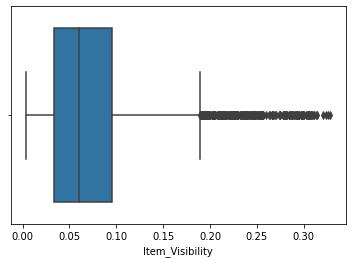

In [38]:
sns.boxplot(df['Item_Visibility'])

In [39]:
df.shape

(14204, 13)

In [40]:
df = df[np.abs(df.Item_Visibility-df.Item_Visibility.mean())<=(3*df.Item_Visibility.std())]

df.shape

(14021, 13)

### Reduce skewness

In [41]:
# reduce skew()
df['Item_Visibility'].skew()

0.8641160059889531

#### SQRT

In [42]:
A = np.sqrt(df['Item_Visibility'])
A.skew()

0.2293499381869368

#### Boxcox

In [43]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
B = boxcox1p(df['Item_Visibility'], boxcox_normmax(df['Item_Visibility'] + 1))
B.skew()

0.07120896314837852

#### Log

In [44]:
C = np.log1p(df['Item_Visibility'])
C.skew()

0.7828556293553165

In [45]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

df['Item_Visibility'] = boxcox1p(df['Item_Visibility'], boxcox_normmax(df['Item_Visibility'] + 1))

df['Item_Visibility'].skew()

0.07120896314837852

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

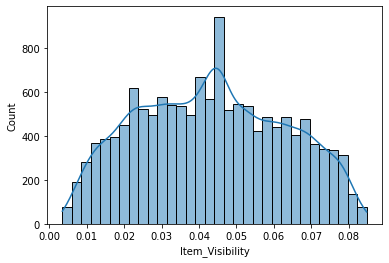

In [46]:
sns.histplot(df['Item_Visibility'], kde=True)

### Scaling Data

In [47]:
from sklearn.preprocessing import MinMaxScaler

m = MinMaxScaler()
df.iloc[:, :-2] = m.fit_transform(df.iloc[:, :-2])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,0.271429,0.282525,0.0,0.137702,0.266667,0.927507,1.000000,0.416667,0.333333,0.0,0.333333,3735.1380,train
1,0.028571,0.081274,1.0,0.170384,0.933333,0.072068,0.333333,0.000000,0.333333,1.0,0.666667,443.4228,train
2,0.457143,0.770765,0.0,0.145012,0.666667,0.468288,1.000000,0.416667,0.333333,0.0,0.333333,2097.2700,train
3,0.600000,0.871986,1.0,0.733955,0.400000,0.640093,0.000000,0.458333,1.000000,1.0,0.000000,732.3800,train
4,0.685714,0.260494,0.0,0.459845,0.600000,0.095805,0.111111,0.916667,0.000000,1.0,0.333333,994.7052,train


In [48]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

train.shape, test.shape

((8423, 13), (5598, 13))

In [49]:
train.drop("source", axis=1, inplace=True)
test.drop("source", axis=1, inplace=True)

train.shape, test.shape

((8423, 12), (5598, 12))

In [50]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# Modelling

In [51]:
# Modelling
from sklearn.model_selection import train_test_split, cross_val_score

# Import models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [52]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1] # Item_Outlet_Sales

In [53]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),
        LinearRegression(),
        Lasso(),
        Ridge(),
        ElasticNet(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
        XGBRegressor()]

names=['KNeighborsRegressor',
       'LinearRegression',
       'Lasso',
       'Ridge',
       'ElasticNet',
       'DecisionTreeRegressor',
       'RandomForestRegressor',
       'AdaBoostRegressor',
       'GradientBoostingRegressor',
       'XGBRegressor']

In [55]:
independent = X
dependent = y
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

name = []
meanabs = []
meansqd = []
rootmeansqd = []
r2 = []
mcv = []

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = cross_val_score(model, independent, dependent, cv=10)
    
    name.append(names[i])
    meanabs.append(np.round(mean_absolute_error(y_predict, y_test), 4))
    meansqd.append(np.round(mean_squared_error(y_predict, y_test), 4))
    rootmeansqd.append(np.round(np.sqrt(mean_squared_error(y_predict, y_test)), 4))
    r2.append(np.round(r2_score(y_predict, y_test), 4)*100)
    mcv.append(np.round(np.mean(score), 4)*100)

data = pd.DataFrame()
data['Model'] = name
data['MAE'] = meanabs
data['MSE'] = meansqd
data['RMSE'] = rootmeansqd
data['R2 Score'] = r2
data['Mean Cross Validation'] = mcv
data.set_index('Model', inplace=True)

In [56]:
data

,MAE,MSE,RMSE,R2 Score,Mean Cross Validation
Model,,,,,
KNeighborsRegressor,877.2053,1.583939e+06,1258.5463,7.63,50.32
LinearRegression,938.0887,1.586143e+06,1259.4216,-16.84,49.61
Lasso,937.5213,1.586172e+06,1259.4332,-18.03,49.65
Ridge,937.9448,1.586298e+06,1259.4834,-17.34,49.62
ElasticNet,1258.3399,2.644517e+06,1626.1972,-8856.28,12.62
DecisionTreeRegressor,1149.2206,2.664313e+06,1632.2724,16.72,15.38
RandomForestRegressor,850.8782,1.462632e+06,1209.3930,20.08,54.62
AdaBoostRegressor,960.3094,1.583904e+06,1258.5324,-10.10,43.29
GradientBoostingRegressor,810.5513,1.344701e+06,1159.6123,18.54,58.77


In [ ]:
# Hyperparameter turning
from sklearn.model_selection import GridSearchCV

# Random Forest
params = {"n_estimators": [100, 300, 500],
          "min_samples_split": [1, 2, 3, 4],
          "min_samples_leaf": [1, 2, 3, 4],
          "max_depth": [None, 1, 2, 3, 4, 5]}

g = GridSearchCV(RandomForestRegressor(), params, cv=5)
g.fit(X_train, y_train)
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)